## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 상관계수의 추정과 검정

In [2]:
df_student = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Student.csv',
                          index_col = 'ID')

df_student

,Age,Income,Expense
ID,,,
1,25,170,67
2,28,177,62
3,20,165,53
4,16,150,48
5,19,160,58
6,21,160,59
7,22,173,60
8,16,169,57
9,20,169,70


In [3]:
# 데이터 값 실수. 소수점 셋째 자리까지 표시
# .round(3) 사용 또는 pd.options.display.float_format = '{:.3f}'.format

df_student.describe().round(3)

,Age,Income,Expense
count,17.000,17.000,17.000
mean,21.353,171.353,65.765
std,4.271,9.334,10.010
min,16.000,150.000,48.000
25%,19.000,169.000,59.000
50%,20.000,170.000,63.000
75%,25.000,179.000,74.000
max,30.000,189.000,82.000


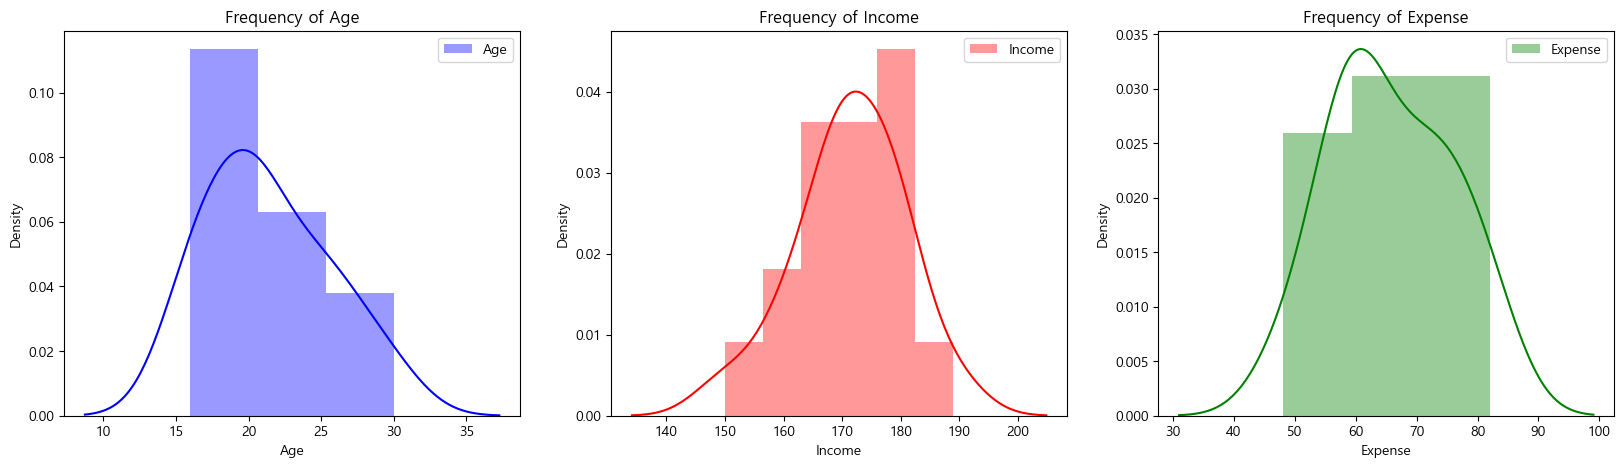

In [4]:
plt.figure(figsize=(20,5))

ax1 = plt.subplot(131)
ax1 = sb.distplot( df_student.Age, label="Age", color = 'blue')
ax1.set( title = "Frequency of Age")
plt.legend()

ax2 = plt.subplot(132)
ax2 = sb.distplot( df_student.Income, label="Income", color = 'red')
ax2.set( title = "Frequency of Income")
plt.legend()

ax3 = plt.subplot(133)
ax3 = sb.distplot( df_student.Expense, label="Expense", color = 'green')
ax3.set( title = "Frequency of Expense")
plt.legend()

plt.show()

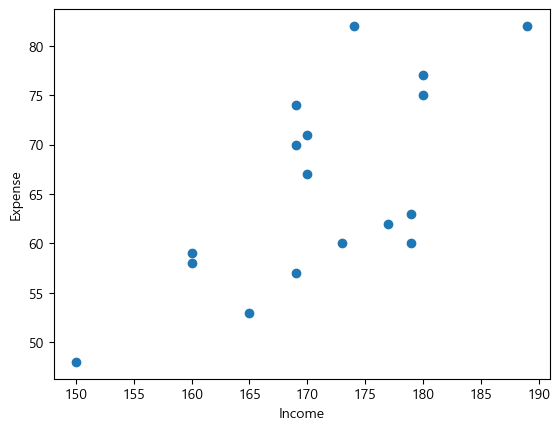

In [5]:
plt.scatter( x = df_student.Income,
             y = df_student.Expense )
plt.xlabel('Income')
plt.ylabel('Expense')
plt.show()

- `seaborn.jointplot()` https://seaborn.pydata.org/generated/seaborn.jointplot.html

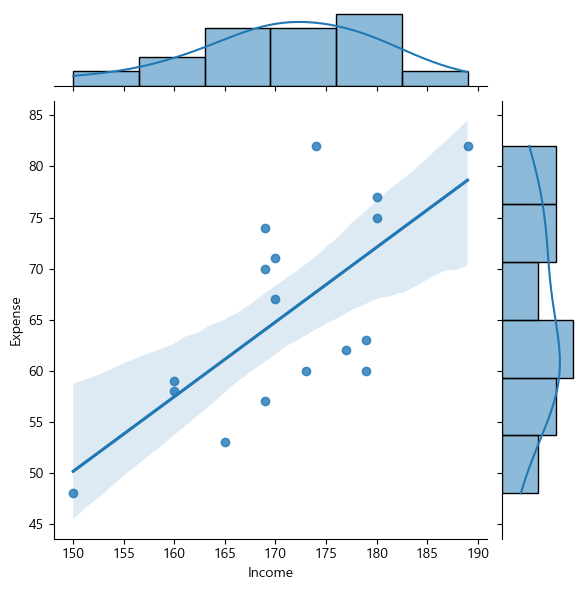

In [6]:
sb.jointplot( df_student.Income,
              df_student.Expense,
              kind = 'reg')
plt.show()

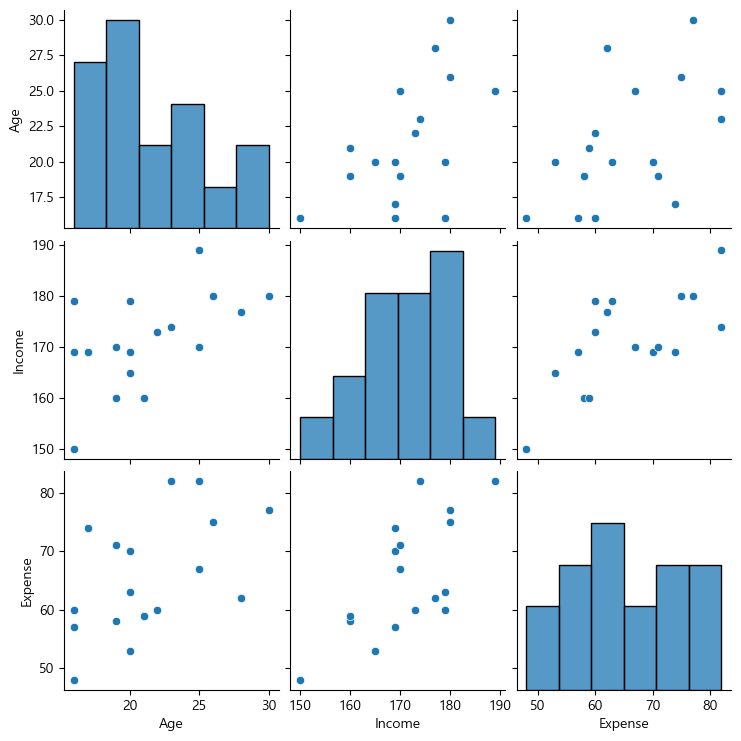

In [7]:
sb.pairplot( df_student.iloc[:, 0:3] )
plt.show()

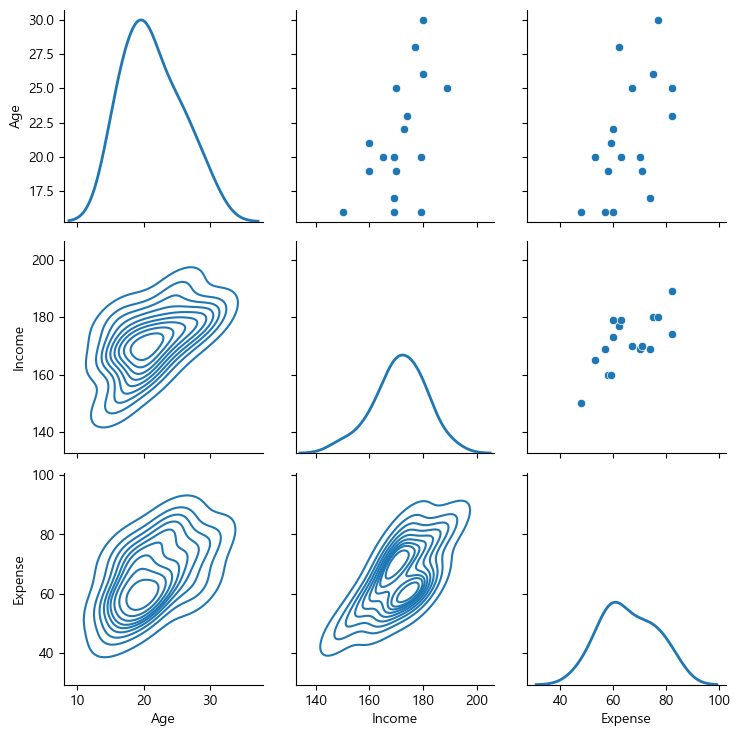

In [8]:
g = sb.PairGrid( df_student.iloc[:, 0:3] )

g.map_upper( sb.scatterplot )
g.map_lower( sb.kdeplot )
g.map_diag( sb.kdeplot, lw=2 )

plt.show()

## 상관계수 계산

### Pandas 내장함수 사용

- `pandas.DataFrame.corr( method='pearson', min_periods=1 )`  
method = {‘pearson’, ‘kendall’, ‘spearman’}  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [9]:
data = df_student.iloc[:, 0:3]

pearson = data.corr()
kendall = data.corr( method = 'kendall' )
spearman = data.corr( method = 'spearman' )

print('< Pearson correlation coefficient >')
print( pearson )
print()

print('< Kendall Tau correlation coefficient >')
print( kendall )
print()

print('< Spearman rank correlation >')
print( spearman )
print()

< Pearson correlation coefficient >
              Age    Income   Expense
Age      1.000000  0.546968  0.529814
Income   0.546968  1.000000  0.681296
Expense  0.529814  0.681296  1.000000

< Kendall Tau correlation coefficient >
              Age    Income   Expense
Age      1.000000  0.397059  0.382353
Income   0.397059  1.000000  0.514706
Expense  0.382353  0.514706  1.000000

< Spearman rank correlation >
              Age    Income   Expense
Age      1.000000  0.584263  0.568525
Income   0.584263  1.000000  0.703457
Expense  0.568525  0.703457  1.000000



## 상관계수에 대한 검정

### SciPy 패키지 사용
- Pearson 상관계수 (모수 검정)  
`scipy.stats.pearsonr( x, y )`  
Returns : correlation, p-value  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html  

- Kendall’s tau (순위 상관계수, 비모수 검정)  
`scipy.stats.kendalltau( x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b' )`  
Returns : correlation, p-value  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html

- Spearman 상관계수 (순위 상관계수, 비모수 검정)  
`scipy.stats.spearmanr( a, b=None, axis=0, nan_policy='propagate', alternative='two-sided' )`  
Returns : correlation, p-value  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [10]:
# 피어슨 상관계수

corr, pval = stats.pearsonr( df_student.Income, df_student.Expense )

print('correlation :', corr.round(3))
print()
print('p-value :', pval.round(3))
print()

correlation : 0.681

p-value : 0.003



In [11]:
# 켄달 상관계수

corr, pval = stats.kendalltau( df_student.Income, df_student.Expense )

print('correlation :', corr.round(3))
print()
print('p-value :', pval.round(3))
print()

correlation : 0.525

p-value : 0.004



In [12]:
# 스피어만 상관계수

corr, pval = stats.spearmanr( df_student.Income, df_student.Expense )

print('correlation :', corr.round(3))
print()
print('p-value :', pval.round(3))
print()

correlation : 0.703

p-value : 0.002



In [13]:
# 상관계수에 대한 검정 수행

# scipy.stats.pearsonr(x, y)    # 입력 배열

# scipy.stats.kendalltau( x, y,    # 같은 모양의 순위 배열. 만약, 배열이 1차원이 아니라면 1차원으로 평면화된다.
#                         nan_policy = 'propagate',    # 입력에 nan이 포함된 경우 처리 방법을 정의. 기본값은 'propagate'
#                                                      # 'propagate': NaN 을 반환
#                                                      # 'rarise': 에러를 발생시킨다.
#                                                      # 'omit' : NaN 값을 무시하고 계산을 수행
#                         method = 'auto',    # p-값을 계산하는 데 사용되는 방법을 정의. 기본값은 'auto'
#                                             # 'auto': 속도와 정확도 간의 균형을 기반으로 적절한 방법을 선택
#                                             # 'asymptotic': 큰 표본에 유효한 정규 근사값을 사용
#                                             # 'exact': 정확한 p-값을 계산하지만 동률이 없는 경우에만 사용. 샘플 크기가 증가함에 따라 계산 시간이 증가하고 결과의 정밀도에 약간의 손실이 있을 수 있음.
#                         variant ='b' )    # 반환 되는 Kendall 의 tau 변형을 정의. 'b'와 'c' 중에 선택하여 적용. 기본값은 'b'.

# scipy.stats.spearmanr( a, b = None,    # 여러 변수와 관측값을 포함하는 하나 또는 두 개의 1차원 또는 2차원 배열.
#                                        # b 는 선택사항.
#                        axis = 0,    # axis = 0 (기본값)이면 각 열은 행에 관측값이 있는 변수를 나타냄.
#                                     # axis = 1 이면 관계가 전치됨. 각 행은 변수를 나타내고 열은 관측값을 포함함.
#                                     # axis = None이면 두 배열이 모두 얽힌다.
#                        nan_policy = 'propagate',   # 입력에 nan이 포함된 경우 처리 방법을 정의. 기본값은 'propagate'
#                                                    # 'propagate': NaN 을 반환
#                                                    # 'rarise': 에러를 발생시킨다.
#                                                    # 'omit' : NaN 값을 무시하고 계산을 수행
#                        alternative = 'two-sided' )    # 대립 가설을 정의. 기본값은 'two-sided'
#                                                       # 'two-sided': 상관 관계가 0 이 아니다.
#                                                       # 'less': 상관관계가 0 보다 작다.
#                                                       # 'greater': 상관관계가 0 보다 크다.

result = stats.pearsonr( df_student.Income, df_student.Expense )
print( f' correlation: {result[0]:.4f}, \n P-value: {result[1]:.24f} ' )

if result[1] > 0.05:
    print(' p-value > 0.05 이므로 귀무가설 채택. 두 변수 간에는 상관관계가 없다.')
if result[1] < 0.05:
    print(' p-value < 0.05 이므로 귀무가설 기각. 두 변수 간에는 상관관계가 있다.')
print()

 correlation: 0.6813, 
 P-value: 0.002600649694694206256335 
 p-value < 0.05 이므로 귀무가설 기각. 두 변수 간에는 상관관계가 있다.



### pingouin 패키지 사용

- `pingouin.pairwise_corr( data, columns=None, covar=None, alternative='two-sided', method='pearson', padjust='none', nan_policy='pairwise' )`  
methode = { 'pearson', 'spearman', 'kendall', 'bicor', 'percbend', 'shepherd', 'skipped' }  
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html

In [14]:
data.pairwise_corr(method='pearson').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Age,Income,pearson,two-sided,17,0.547,"[0.09, 0.81]",0.023,3.255,0.653
1,Age,Expense,pearson,two-sided,17,0.530,"[0.07, 0.81]",0.029,2.735,0.619
2,Income,Expense,pearson,two-sided,17,0.681,"[0.3, 0.88]",0.003,19.505,0.889


In [15]:
data.pairwise_corr(method='kendall').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Age,Income,kendall,two-sided,17,0.444,"[-0.05, 0.76]",0.017,0.448
1,Age,Expense,kendall,two-sided,17,0.397,"[-0.1, 0.74]",0.031,0.364
2,Income,Expense,kendall,two-sided,17,0.525,"[0.06, 0.8]",0.004,0.608


In [16]:
data.pairwise_corr(method='spearman').round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Age,Income,spearman,two-sided,17,0.584,"[0.14, 0.83]",0.014,0.727
1,Age,Expense,spearman,two-sided,17,0.569,"[0.12, 0.82]",0.017,0.696
2,Income,Expense,spearman,two-sided,17,0.703,"[0.34, 0.88]",0.002,0.917


## 상관계수 시각화

### 히트맵을 이용한 상관계수 시각화

- `seaborn.heatmap( data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs )`  
https://seaborn.pydata.org/generated/seaborn.heatmap.html

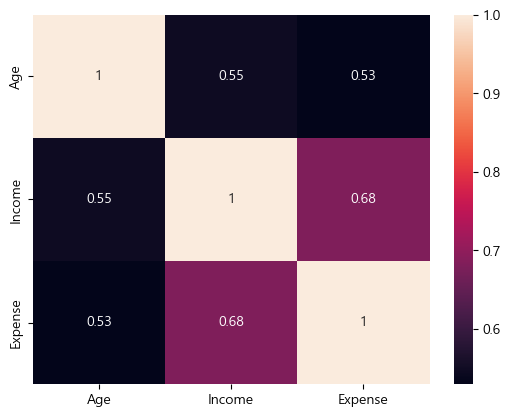

In [17]:
corr_mat = data.corr()

sb.heatmap( corr_mat, annot = True )
plt.show()

## 편상관계수

In [18]:
df_satis = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\Satis.csv',
                        index_col = 'ID')
df_satis

,Age,Satis1,Satis2
ID,,,
1,28,0,70
2,23,0,55
3,26,5,65
4,27,5,65
5,25,10,60
6,26,20,65
7,29,25,70
8,31,25,75
9,32,25,80


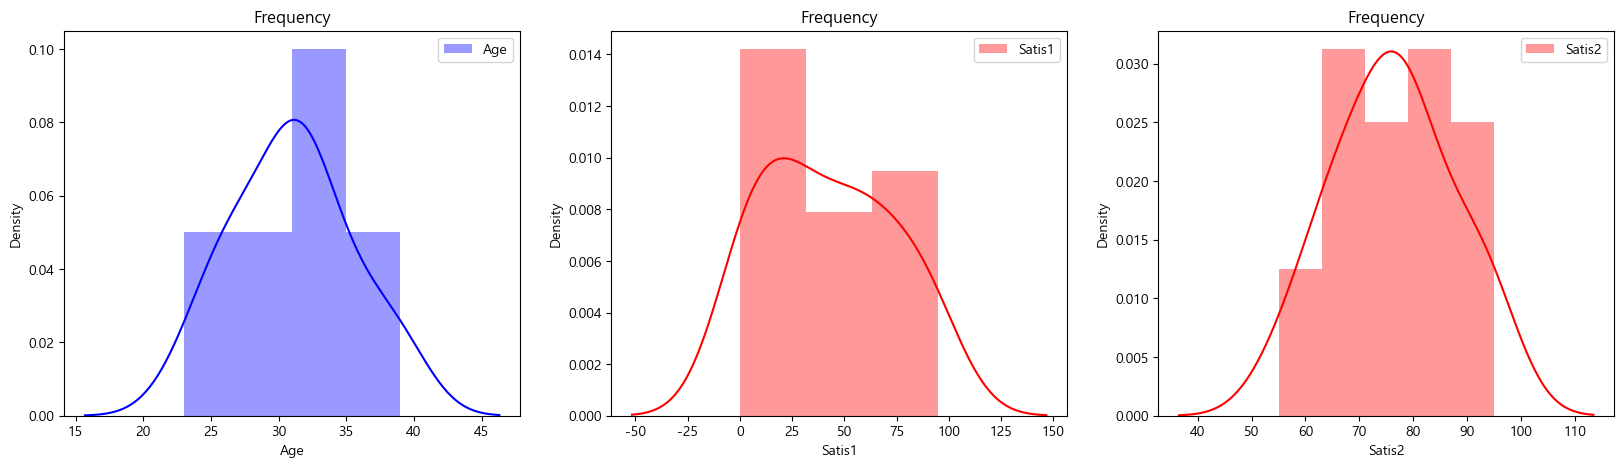

In [19]:
plt.figure(figsize=(20,5))

ax1 = plt.subplot(131)
ax1 = sb.distplot( df_satis.Age, label="Age", color = 'blue')
ax1.set( xlabel = "Age", title = "Frequency")
plt.legend()

ax2 = plt.subplot(132)
ax2 = sb.distplot( df_satis.Satis1, label="Satis1", color = 'red')
ax2.set( xlabel = "Satis1", title = "Frequency")
plt.legend()

ax3 = plt.subplot(133)
ax3 = sb.distplot( df_satis.Satis2, label="Satis2", color = 'red')
ax3.set( xlabel = "Satis2", title = "Frequency")
plt.legend()

plt.show()

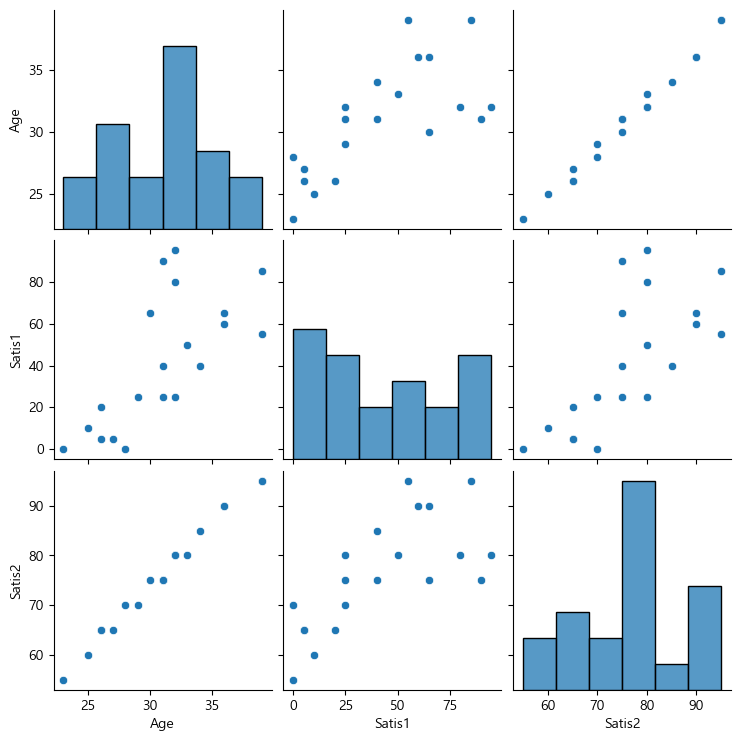

In [20]:
sb.pairplot( df_satis )
plt.show()

- `seaborn.jointplot()` https://seaborn.pydata.org/generated/seaborn.jointplot.html

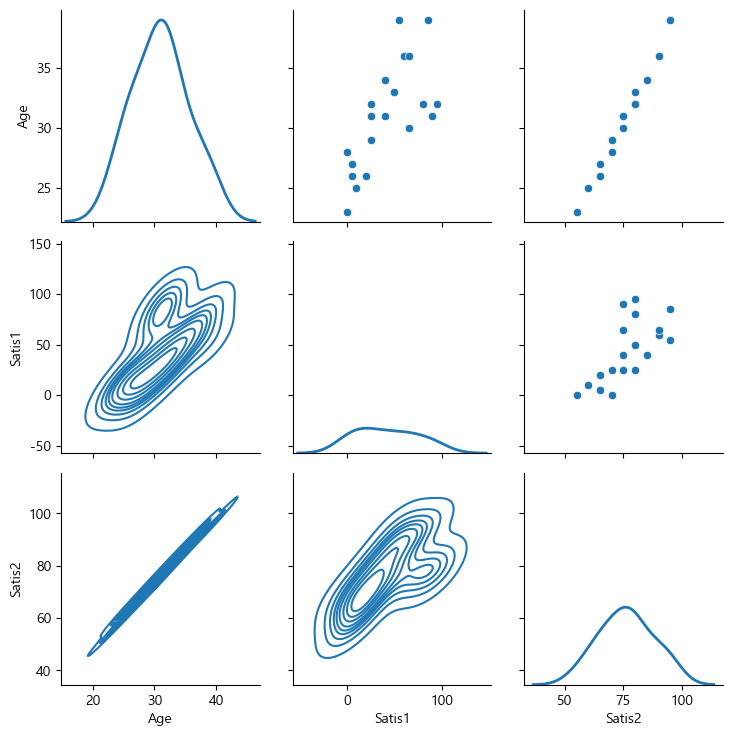

In [21]:
g = sb.PairGrid( df_satis )

g.map_upper( sb.scatterplot )
g.map_lower( sb.kdeplot )
g.map_diag( sb.kdeplot, lw=2 )

plt.show()

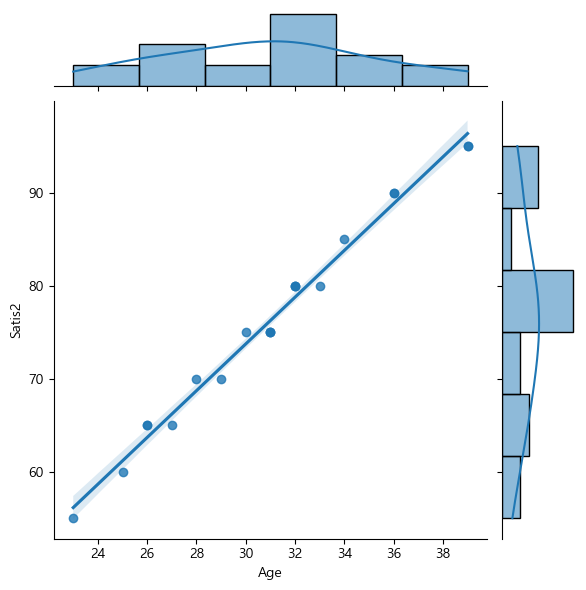

In [22]:
sb.jointplot( df_satis.Age,
              df_satis.Satis2,
              kind = 'reg')
plt.show()

### pingouin 패키지 사용

- `pingouin.pcorr(self)`  
https://pingouin-stats.org/generated/pingouin.pcorr.html

- `pingouin.partial_corr( data=None, x=None, y=None, covar=None, x_covar=None, y_covar=None, alternative='two-sided', method='pearson', **kwargs )`  
https://pingouin-stats.org/generated/pingouin.partial_corr.html

In [23]:
df_satis.pairwise_corr().round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Age,Satis1,pearson,two-sided,20,0.698,"[0.37, 0.87]",0.001,64.827,0.953
1,Age,Satis2,pearson,two-sided,20,0.993,"[0.98, 1.0]",0.000,4.271e+14,1.000
2,Satis1,Satis2,pearson,two-sided,20,0.703,"[0.38, 0.87]",0.001,72.232,0.956


In [24]:
df_satis.pcorr().round(3)

,Age,Satis1,Satis2
Age,1.000,-0.003,0.987
Satis1,-0.003,1.000,0.115
Satis2,0.987,0.115,1.000


In [25]:
df_satis.partial_corr( x = 'Satis1' , y = 'Satis2', covar = 'Age')

,n,r,CI95%,p-val
pearson,20,0.115032,"[-0.36, 0.54]",0.639117


In [26]:
df_satis.partial_corr( x = 'Age' , y = 'Satis1', covar = 'Satis2')

,n,r,CI95%,p-val
pearson,20,-0.002983,"[-0.46, 0.45]",0.990332


In [27]:
df_satis.partial_corr( x = 'Age' , y = 'Satis2', covar = 'Satis1')

,n,r,CI95%,p-val
pearson,20,0.987209,"[0.97, 1.0]",5.358792e-15


In [28]:
df_satis.loc[ df_satis.Age<30, 'AgeGroup' ] = 'Under30'
df_satis.loc[ df_satis.Age>=30, 'AgeGroup' ] = 'Over30'

df_satis

,Age,Satis1,Satis2,AgeGroup
ID,,,,
1,28,0,70,Under30
2,23,0,55,Under30
3,26,5,65,Under30
4,27,5,65,Under30
5,25,10,60,Under30
6,26,20,65,Under30
7,29,25,70,Under30
8,31,25,75,Over30
9,32,25,80,Over30


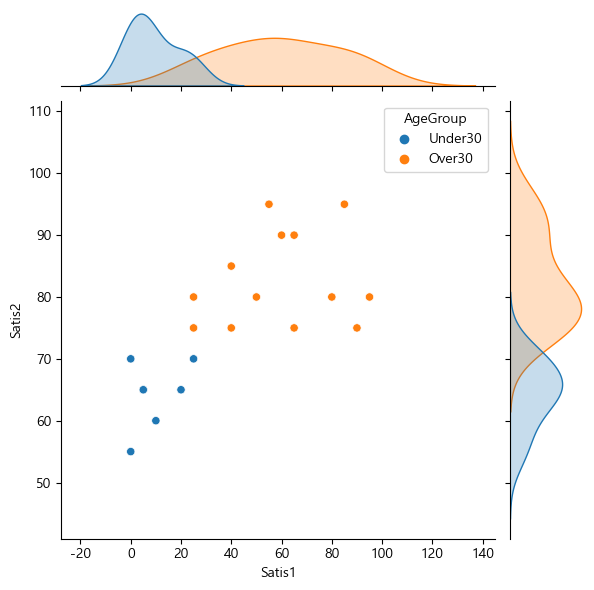

In [29]:
sb.jointplot( data = df_satis,
              x = 'Satis1',
              y = 'Satis2', 
              hue = 'AgeGroup' )
plt.show()

In [30]:
# 30세 이하의 상관계수
corr, pval = stats.pearsonr( df_satis[ df_satis.AgeGroup == 'Under30' ].Satis1,
                             df_satis[ df_satis.AgeGroup == 'Under30' ].Satis2 )

print( '< 30세 이하의 단순 상관계수 >', '\n'
       '피어슨 상관계수 :', corr.round(4), '\n'
       'p-value : ', pval.round(4), '\n' )

< 30세 이하의 단순 상관계수 > 
피어슨 상관계수 : 0.388 
p-value :  0.3898 



In [31]:
# 30세 이상의 상관계수
corr, pval = stats.pearsonr( df_satis[ df_satis.AgeGroup == 'Over30' ].Satis1,
                             df_satis[ df_satis.AgeGroup == 'Over30' ].Satis2 )

print( '< 30세 이상의 단순 상관계수 >', '\n'
       '피어슨 상관계수 :', corr.round(4), '\n'
       'p-value : ', pval.round(4), '\n' )

< 30세 이상의 단순 상관계수 > 
피어슨 상관계수 : 0.1718 
p-value :  0.5746 



In [32]:
df_satis.Satis2.median()

75.0

<AxesSubplot:xlabel='Satis2', ylabel='Density'>

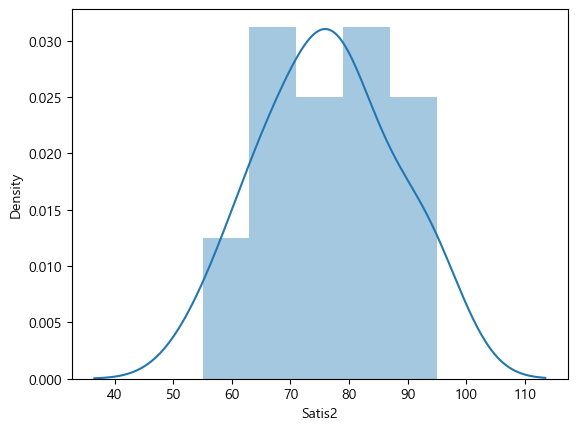

In [33]:
sb.distplot( df_satis.Satis2 )

In [34]:
df_satis.loc[ df_satis.Satis2<73, 'Satis2Group' ] = 'Under73'
df_satis.loc[ df_satis.Satis2>=73, 'Satis2Group' ] = 'Over73'

df_satis

,Age,Satis1,Satis2,AgeGroup,Satis2Group
ID,,,,,
1,28,0,70,Under30,Under73
2,23,0,55,Under30,Under73
3,26,5,65,Under30,Under73
4,27,5,65,Under30,Under73
5,25,10,60,Under30,Under73
6,26,20,65,Under30,Under73
7,29,25,70,Under30,Under73
8,31,25,75,Over30,Over73
9,32,25,80,Over30,Over73


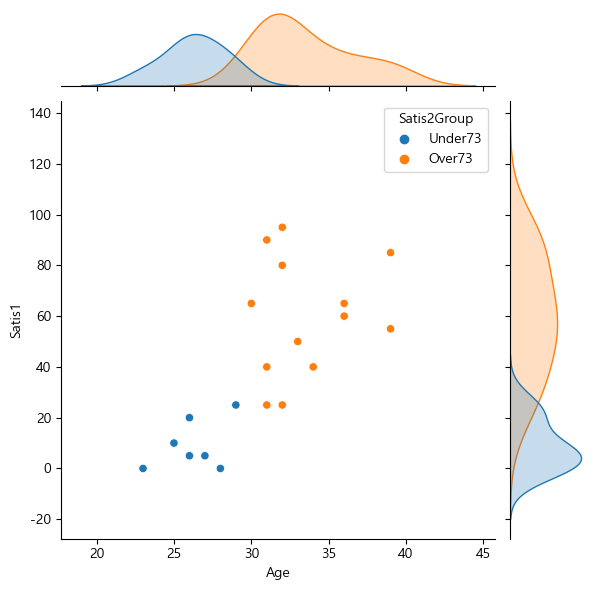

In [35]:
sb.jointplot( data = df_satis,
              x = 'Age',
              y = 'Satis1', 
              hue = 'Satis2Group' )
plt.show()

In [36]:
corr, pval = stats.pearsonr( df_satis[ df_satis.Satis2Group == 'Under73' ].Age,
                             df_satis[ df_satis.Satis2Group == 'Under73' ].Satis1 )

print( '< Satis2 하위그룹의 단순 상관계수 >', '\n'
       '피어슨 상관계수 :', corr.round(4), '\n'
       'p-value : ', pval.round(4), '\n' )

< Satis2 하위그룹의 단순 상관계수 > 
피어슨 상관계수 : 0.4445 
p-value :  0.3177 



In [37]:
corr, pval = stats.pearsonr( df_satis[ df_satis.Satis2Group == 'Over73' ].Age,
                             df_satis[ df_satis.Satis2Group == 'Over73' ].Satis1 )

print( '< Satis2 상위그룹의 단순 상관계수 >', '\n'
       '피어슨 상관계수 :', corr.round(4), '\n'
       'p-value : ', pval.round(4), '\n' )

< Satis2 상위그룹의 단순 상관계수 > 
피어슨 상관계수 : 0.1552 
p-value :  0.6127 



# 교차분석

## 분포에 대한 동일성 검정

In [38]:
df_prefer = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\Prefer.csv',
                        index_col = 'ID')

df_prefer

,Agegroup,Product
ID,,
1,30<,B
2,30>=,B
3,30<,B
4,30<,A
5,30>=,B
...,...,...
296,30<,C
297,30<,C
298,30>=,A


### 교차표 작성

- `pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)`  
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [39]:
# 교차표

cm_prefer = pd.crosstab( df_prefer.Agegroup,
                         df_prefer.Product )

cm_prefer

Product,A,B,C
Agegroup,,,
30<,20,20,60
30>=,70,100,30


In [40]:
# 교차표 (margins 옵션 적용)

pd.crosstab( df_prefer.Agegroup,
             df_prefer.Product,
             margins = True,
             margins_name = '합계')

Product,A,B,C,합계
Agegroup,,,,
30<,20,20,60,100
30>=,70,100,30,200
합계,90,120,90,300


In [41]:
# 교차표 ( 각각의 행에 대해서 정규화 한 결과 )

pd.crosstab( df_prefer.Agegroup, df_prefer.Product,
             margins = True, margins_name = '합계',
             normalize = 'index')

Product,A,B,C
Agegroup,,,
30<,0.20,0.2,0.60
30>=,0.35,0.5,0.15
합계,0.30,0.4,0.30


### 카이제곱 검정 (정규근사 검정)

- 표준정규분포를 따르는 확률변수 z의 제곱은 자유도가 1인 카이제곱분포를 따르므로 카이제곱 검정을 이용하여 정규근사 검정을 수행할 수 있다.

- 교차표에서의 변수들 간의 카이제곱 검정  
`scipy.stats.chi2_contingency( observed, correction=True, lambda_=None )`  
Returns : `chi2`, `p`, `dof`, `expected`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [42]:
chi2, pval, df, expected = stats.chi2_contingency( cm_prefer )

print( '카이제곱 검정통계량 :', chi2, '\n\n',
       'p-value :', pval, '\n\n',
       '자유도 :', df, '\n\n',
       '기대도수 :', '\n', expected, '\n')

카이제곱 검정통계량 : 65.0 

 p-value : 7.681204685202098e-15 

 자유도 : 2 

 기대도수 : 
 [[30. 40. 30.]
 [60. 80. 60.]] 



### 교차표가 3X3 이상일 때의 피셔의 정확성 검정  

- `scipy.stats.fisher_exact()`는 2X2 교차표만 검정 가능하므로 다른 방법을 사용해야 한다.  


- FisherExact 패키지 설치 및 사용 ( ADP 시험에 사용 가능한 패키지가 아님!!! )    
현재 최신버전의 pip installer 에는 설치가 안됨.  
표본의 크기가 큰 경우에는 계산시간 및 메모리 소모가 크다.  
pip install FisherExact  
from FisherExact import fisherexact  
`fisherexact( table, alternative='two-sided' )`  
Returns : `oddsratio`, `p_value`

## 두 변수의 독립성 검정

In [43]:
soft = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\Softdrink.csv')

df_soft = soft.replace( {'Agegroup' : {1:'20대', 2:'30대', 3:'40대'},
                         'Drink' : {1:'coke', 2:'pepsi', 3:'fanta', 4:'others'} } )

df_soft                        

,Agegroup,Drink,Count
0,20대,coke,10
1,20대,pepsi,14
2,20대,fanta,4
3,20대,others,12
4,30대,coke,13
5,30대,pepsi,9
6,30대,fanta,10
7,30대,others,8
8,40대,coke,12
9,40대,pepsi,8


In [44]:
df_soft.groupby('Agegroup').describe()

Count                                              
         count  mean       std  min   25%   50%    75%   max
Agegroup                                                    
20대        4.0  10.0  4.320494  4.0  8.50  11.0  12.50  14.0
30대        4.0  10.0  2.160247  8.0  8.75   9.5  10.75  13.0
40대        4.0  10.0  1.632993  8.0  9.50  10.0  10.50  12.0

### 교차표 작성

- `pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)`  
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [45]:
pd.crosstab( df_soft.Agegroup,
             df_soft.Drink )

Drink,coke,fanta,others,pepsi
Agegroup,,,,
20대,1,1,1,1
30대,1,1,1,1
40대,1,1,1,1


In [46]:
# 교차표

cm_soft = pd.crosstab( df_soft.Agegroup,
                       df_soft.Drink,
                       values = df_soft.Count,
                       aggfunc = 'sum' )
cm_soft

Drink,coke,fanta,others,pepsi
Agegroup,,,,
20대,10,4,12,14
30대,13,10,8,9
40대,12,10,10,8


In [47]:
# 교차표 (margins 옵션 적용)

pd.crosstab( df_soft.Agegroup, df_soft.Drink,
             values = df_soft.Count,
             aggfunc = sum,
             margins = True, margins_name = '전체' )

Drink,coke,fanta,others,pepsi,전체
Agegroup,,,,,
20대,10,4,12,14,40
30대,13,10,8,9,40
40대,12,10,10,8,40
전체,35,24,30,31,120


In [48]:
# 교차표 (margins 옵션 적용 및 모든 행 별로 정규화)

pd.crosstab( df_soft.Agegroup, df_soft.Drink,
             values = df_soft.Count,
             aggfunc = sum,
             margins = True, margins_name = '전체',
             normalize = 'index' )

Drink,coke,fanta,others,pepsi
Agegroup,,,,
20대,0.250000,0.10,0.30,0.350000
30대,0.325000,0.25,0.20,0.225000
40대,0.300000,0.25,0.25,0.200000
전체,0.291667,0.20,0.25,0.258333


### 카이제곱 검정 (정규근사 검정)

- 표준정규분포를 따르는 확률변수 z의 제곱은 자유도가 1인 카이제곱분포를 따르므로 카이제곱 검정을 이용하여 정규근사 검정을 수행할 수 있다.

- 교차표에서의 변수들 간의 카이제곱 검정  
`scipy.stats.chi2_contingency( observed, correction=True, lambda_=None )`  
Returns : `chi2`, `p`, `dof`, `expected`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [49]:
chi2, pval, df, expected = stats.chi2_contingency( cm_soft )

print( '카이제곱 검정통계량 :', chi2, '\n\n',
       'p-value :', pval, '\n\n',
       '자유도 :', df, '\n\n',
       '기대도수 :', '\n', expected, '\n')

카이제곱 검정통계량 : 6.2 

 p-value : 0.4011631473146323 

 자유도 : 6 

 기대도수 : 
 [[11.66666667  8.         10.         10.33333333]
 [11.66666667  8.         10.         10.33333333]
 [11.66666667  8.         10.         10.33333333]] 



### 교차표가 3X3 이상일 때의 피셔의 정확성 검정  

- `scipy.stats.fisher_exact()`는 2X2 교차표만 검정 가능하므로 다른 방법을 사용해야 한다.  


- FisherExact 패키지 설치 및 사용 ( ADP 시험에 사용 가능한 패키지가 아님!!! )    
현재 최신버전의 pip installer 에는 설치가 안됨.  
표본의 크기가 큰 경우에는 계산시간 및 메모리 소모가 크다.  
pip install FisherExact  
from FisherExact import fisherexact  
`fisherexact( table, alternative='two-sided' )`  
Returns : `oddsratio`, `p_value`

## 카이제곱 적합도 검정

### 일원 카이제곱 검정 (One-way χ2 test)  

- `scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)`  
Returns : `chisq`, `p`  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [50]:
# 실제관측 빈도
pea = np.array([315,108,101,32])
print('실제관측 빈도 :', pea)
print()

# 기대 빈도
p0 = np.array([9/16,3/16,3/16,1/16])*np.sum(pea)
print('기대 빈도 :', p0)
print()

stat, pval = stats.chisquare(pea, p0)
print('카이제곱 통계량 :', stat, '\n'
      'p-value :', pval)
print()

실제관측 빈도 : [315 108 101  32]

기대 빈도 : [312.75 104.25 104.25  34.75]

카이제곱 통계량 : 0.4700239808153477 
p-value : 0.925425895103616

